<a href="https://colab.research.google.com/github/bama730/CS_4410/blob/main/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The below section is for part 1 of Homework 5

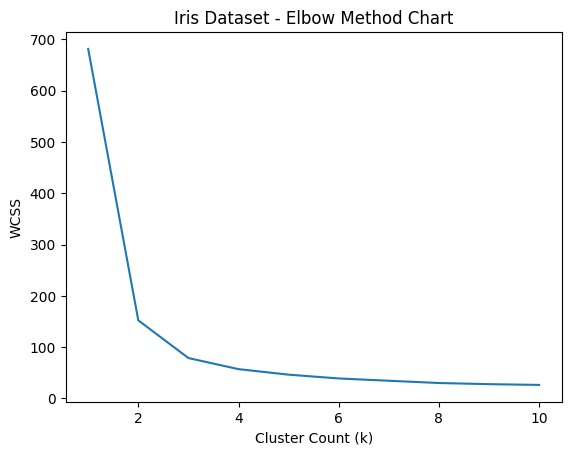

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the iris dataset
iris = load_iris()

# Create k values
k_val = range(1, 11)

# Calculate wcss for each k value
wcss = []
for k in k_val:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

# Plot wcss vs k
plt.plot(k_val, wcss)
plt.title('Iris Dataset - Elbow Method Chart')
plt.ylabel('WCSS')
plt.xlabel('Cluster Count (k)')
plt.show()

The below section is for part 2 of Homework 5. If you run into issue with running this after running part 1, please reload runtime and run this part seperately

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings("ignore")

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Extract data
X, y = mnist.data, mnist.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply PCA with varying numbers of components
n_components_list = [10, 20, 50, 100, 200]

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Logistic regression without PCA
    start_time = time.time()
    logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
    logisticRegr.fit(X_train_scaled, y_train)
    y_pred_no_pca = logisticRegr.predict(X_test_scaled)
    end_time = time.time()
    time_no_pca = end_time - start_time
    accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

    # Logistic regression with PCA
    start_time = time.time()
    logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
    logisticRegr.fit(X_train_pca, y_train)
    y_pred_pca = logisticRegr.predict(X_test_pca)
    end_time = time.time()
    time_pca = end_time - start_time
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    print(f"Number of PCA components: {n_components}")
    print(f"Time without PCA: {time_no_pca:.2f} seconds")
    print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
    print(f"Time with PCA: {time_pca:.2f} seconds")
    print(f"Accuracy with PCA: {accuracy_pca:.4f}")
    print()

Number of PCA components: 10
Time without PCA: 257.76 seconds
Accuracy without PCA: 0.9164
Time with PCA: 7.14 seconds
Accuracy with PCA: 0.8019

Number of PCA components: 20
Time without PCA: 258.23 seconds
Accuracy without PCA: 0.9164
Time with PCA: 9.11 seconds
Accuracy with PCA: 0.8692

Number of PCA components: 50
Time without PCA: 256.67 seconds
Accuracy without PCA: 0.9164
Time with PCA: 12.56 seconds
Accuracy with PCA: 0.9055

Number of PCA components: 100
Time without PCA: 251.54 seconds
Accuracy without PCA: 0.9164
Time with PCA: 30.15 seconds
Accuracy with PCA: 0.9168

Number of PCA components: 200
Time without PCA: 261.06 seconds
Accuracy without PCA: 0.9164
Time with PCA: 63.21 seconds
Accuracy with PCA: 0.9222

